# Validation metrics

## Regression metrics

In [4]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *

import sklearn.metrics as sm
from ds_topics.utils.validation_metrics import *

In [3]:
y_true = [3, 0.1, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mae = sm.mean_absolute_error(y_true, y_pred); print(mae)
mse = sm.mean_squared_error(y_true, y_pred); print(mse)
msle = sm.mean_squared_log_error(y_true, y_pred) ; print(msle) 
meae = sm.median_absolute_error(y_true, y_pred); print(meae)
r2 = sm.r2_score(y_true, y_pred); print(r2)
ev1 = sm.explained_variance_score(y_true, y_pred); print(ev1)


y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
ev2 = sm.explained_variance_score(y_true, y_pred, multioutput='raw_values'); print(ev2)

0.4
0.315
0.010196876669752525
0.3
0.9504083439929155
0.9519826822788546
[0.96774194 1.        ]


## Classification metrics

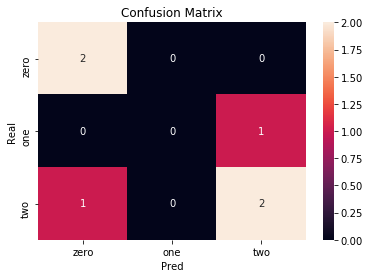

Average precision-recall score: 0.88


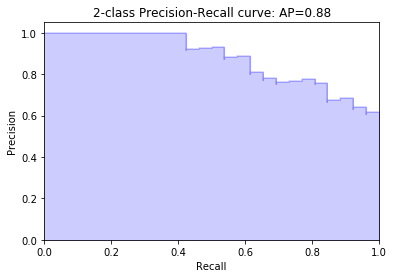

Average precision score, micro-averaged over all classes: 0.43


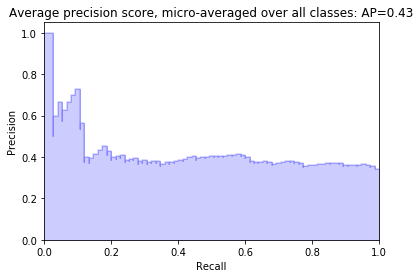

In [7]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy import fftpack

real = [2, 0, 2, 2, 0, 1]
pred = [0, 0, 2, 2, 0, 2]
cm = confusion_matrix(real, pred)
PlotConfMat(cm=cm, labels=['zero','one','two'])


# BINARY

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2], test_size=.5, random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

# Compute precision
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)

# Plot curve
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

# MULTI-LABELLED
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=random_state)

# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))

plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))
plt.show()

## Gini Index

Gini: 0.189, Max. Gini: 0.300, Normalized Gini: 0.630
Sorted Actual Values [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


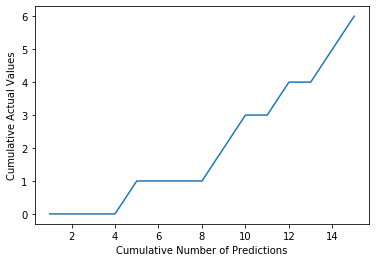

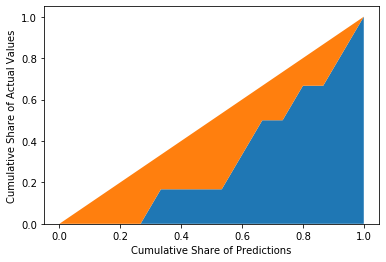

Orange Area: 0.189


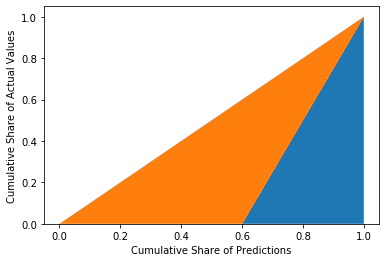

Orange Area: 0.300


In [6]:
import scipy.interpolate
import scipy.integrate

predictions = [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]
actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

gini_predictions = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini= gini_normalized(actual, predictions)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

# Sort the actual values by the predictions
data = zip(actual, predictions)
sorted_data = sorted(data, key=lambda d: d[1])
sorted_actual = [d[0] for d in sorted_data]
print('Sorted Actual Values', sorted_actual)

# Sum up the actual values
cumulative_actual = np.cumsum(sorted_actual)
cumulative_index = np.arange(1, len(cumulative_actual)+1)

plt.plot(cumulative_index, cumulative_actual)
plt.xlabel('Cumulative Number of Predictions')
plt.ylabel('Cumulative Actual Values')
plt.show()

cumulative_actual_shares = cumulative_actual / sum(actual)
cumulative_index_shares = cumulative_index / len(predictions)

# Add (0, 0) to the plot
x_values = [0] + list(cumulative_index_shares)
y_values = [0] + list(cumulative_actual_shares)

# Display the 45° line stacked on top of the y values
diagonal = [x - y for (x, y) in zip(x_values, y_values)]

plt.stackplot(x_values, y_values, diagonal)
plt.xlabel('Cumulative Share of Predictions')
plt.ylabel('Cumulative Share of Actual Values')
plt.show()


fy = scipy.interpolate.interp1d(x_values, y_values)
blue_area, _ = scipy.integrate.quad(fy, 0, 1, points=x_values)
orange_area = 0.5 - blue_area
print('Orange Area: %.3f' % orange_area)


cumulative_actual_shares_perfect = np.cumsum(sorted(actual)) / sum(actual)
y_values_perfect = [0] + list(cumulative_actual_shares_perfect)

# Display the 45° line stacked on top of the y values
diagonal = [x - y for (x, y) in zip(x_values, y_values_perfect)]

plt.stackplot(x_values, y_values_perfect, diagonal)
plt.xlabel('Cumulative Share of Predictions')
plt.ylabel('Cumulative Share of Actual Values')
plt.show()

# Integrate the the curve function
fy = scipy.interpolate.interp1d(x_values, y_values_perfect)
blue_area, _ = scipy.integrate.quad(fy, 0, 1, points=x_values)
orange_area = 0.5 - blue_area
print('Orange Area: %.3f' % orange_area)

## Clustering metrics

In [1]:
from sklearn.metrics.cluster import homogeneity_score

hs = homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0]); print(hs)


1.0
